## Lensing reconstruction

In [4]:
import numpy as np, curvedsky, prjlib, plottools as pl, quad_func, binning as bn, healpy as hp, tools_qrec
from matplotlib.pyplot import *

In [6]:
p0 = prjlib.init_analysis(wtype='Lmask',ascale=1.0,fltr='none')
p1 = prjlib.init_analysis(wtype='Lmask',ascale=1.0,fltr='cinv')
qtau0, qlen0, qtbh0, qlbh0, __ = tools_qrec.init_quad(p0.ids,p0.stag,rlmin=100,rlmax=2048,n0min=1,n0max=50)
qtau1, qlen1, qtbh1, qlbh1, __ = tools_qrec.init_quad(p1.ids,p1.stag,rlmin=100,rlmax=2048,n0min=1,n0max=50)

### Norm and N0

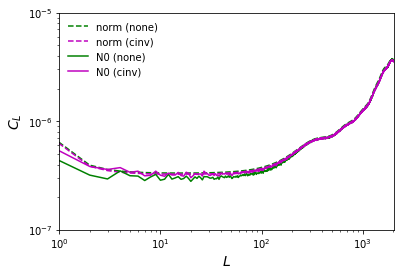

In [7]:
l, al0 = np.loadtxt(qlen0.f['TT'].al,unpack=True,usecols=(0,1))
l, al1 = np.loadtxt(qlen1.f['TT'].al,unpack=True,usecols=(0,1))
l, n00 = np.loadtxt(qlen0.f['TT'].n0bs,unpack=True,usecols=(0,1))
l, n01 = np.loadtxt(qlen1.f['TT'].n0bs,unpack=True,usecols=(0,1))
pl.plot_1dstyle(ymin=1e-7,ymax=1e-5,xmin=1,xmax=2048,ylog=True,xlog=True)
plot(l,al0,'g--',label='norm (none)')
plot(l,al1,'m--',label='norm (cinv)')
plot(l,n00,'g',label='N0 (none)')
plot(l,n01,'m',label='N0 (cinv)')
legend()

### Mean-field spectrum, Real and Sim Reconstructed Spectrum

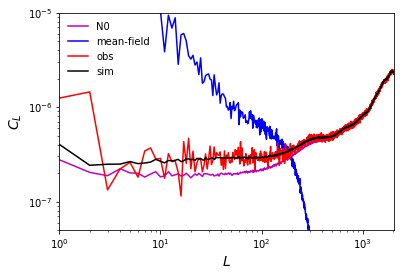

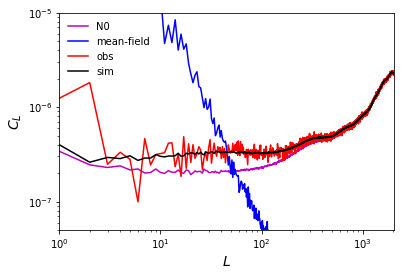

In [8]:
for qobj in [qlen0,qlen1]: 
    l, ml = np.loadtxt(qobj.f['TT'].ml[0],unpack=True,usecols=(0,1))
    l, cl = np.loadtxt(qobj.f['TT'].ocls,unpack=True,usecols=(0,1))
    l, sl = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,1))
    l, n0 = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1))
    pl.plot_1dstyle(ymin=5e-8,ymax=1e-5,xmin=1,xmax=2048,ylog=True,xlog=True)
    plot(l,n0*2./np.pi,'m',label='N0')
    plot(l,ml*2./np.pi,'b',label='mean-field')
    plot(l,cl*2./np.pi,'r',label='obs')
    plot(l,sl*2./np.pi,'k',label='sim')
    legend()
    show()

### Debiased Spectrum, Cross with input

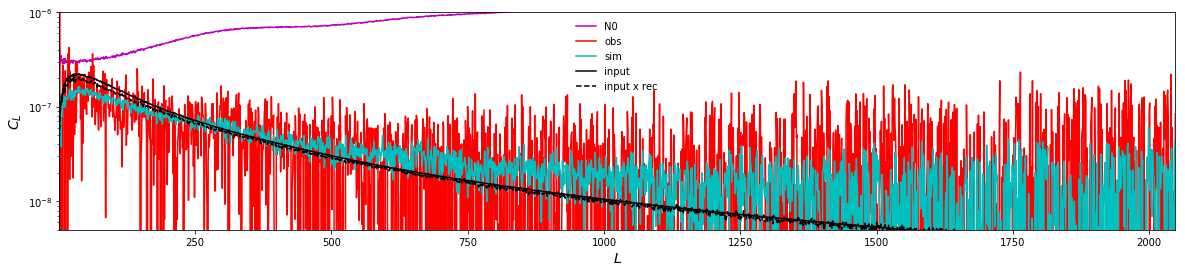

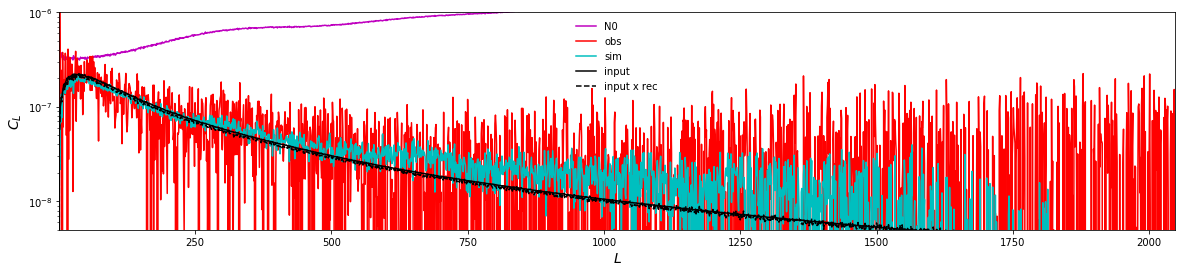

In [9]:
for qobj in [qlen0,qlen1]: 
    pl.plot_1dstyle(fsize=[20,4],ymin=5e-9,ymax=1e-6,xmin=1,xmax=2048,ylog=True)
    l, cl = np.loadtxt(qobj.f['TT'].ocls,unpack=True,usecols=(0,1))
    l, sl, xl, kk = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,1,2,3))
    l, n0 = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1))
    l, rd = np.loadtxt(qobj.f['TT'].rdn0[0],unpack=True,usecols=(0,1))
    plot(l,n0,'m',label='N0')
    plot(l,(cl-rd-n0/100.),'r',label='obs')
    plot(l,(sl-n0-n0/99.),'c',label='sim')
    plot(l,kk,'k-',label='input')
    plot(l,xl,'k--',label='input x rec')
    legend()
    show()

### Corrected Spectrum

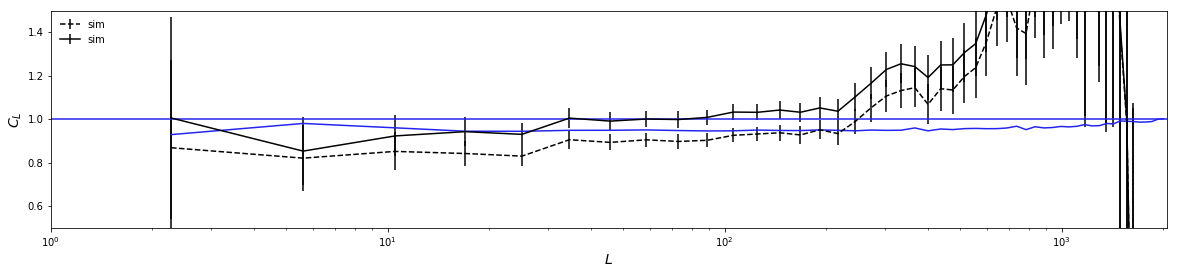

In [13]:
qobj = qlen1
mb = bn.multipole_binning(50,lmin=1,lmax=2048,spc='p2')
l, n0 = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1))
l, sl, xl, kk, vl = np.loadtxt(qobj.f['TT'].mcls,unpack=True,usecols=(0,1,2,3,4))
#l, rd = np.loadtxt(qobj.f['TT'].rdn0[0],unpack=True,usecols=(0,1))
cp = sl-n0-n0/99.
cb = bn.binning(cp,mb)
xb = bn.binning(xl,mb)
kb = bn.binning(kk,mb)
vb = bn.binning(vl,mb)
pl.plot_1dstyle(ymin=.5,ymax=1.5,xmin=1,xmax=2048,xlog=True)
errorbar(mb.bc,cb/kb,color='k',ls='--',yerr=vb/kb/10.,label='sim')
plot(mb.bc,xb/kb)
errorbar(mb.bc,cb/kb*(kb/xb)**2,color='k',yerr=vb/kb*(kb/xb)**2/10.,label='sim')
axhline(1)
legend()
show()